In [8]:
import numpy as np
import matplotlib.pyplot as plt
import schelling as sc

In [9]:
# Crear instancias del modelo Schelling de tamaño de cuadrícula = 30*30 con diferentes valores de umbral de tolerancia (T)

sch_T = {}
sch_T[3] = sc.Schelling(30, 3)
sch_T[4] = sc.Schelling(30, 4)
sch_T[5] = sc.Schelling(30, 5)
sch_T[6] = sc.Schelling(30, 6)

max_steps = 150

# Crear diccionario para almacenar la satisfacción total en cada paso para cada valor de T

sat_T = {}

sat_T[3] = []
sat_T[4] = []
sat_T[5] = []
sat_T[6] = []



In [10]:
def criterio_equilibrio(serie, lag, tol):
    
    """
    Define cuando una serie temporal se encuentra en equilibrio 
    serie: List[Float64]
    lag: Int
    tol: Float64 
    
    """
    
    L = len(serie)
    if L <= lag:
        return False
    
    for i in range(L-1-lag , L-1):
        if np.abs((serie[i] - serie[i-1])/serie[i-1]) >= tol:
            return False
        
    return True
    

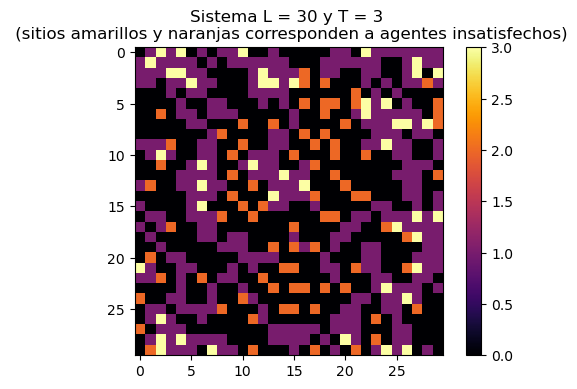

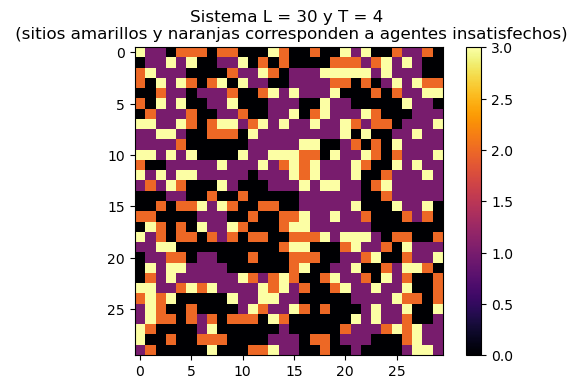

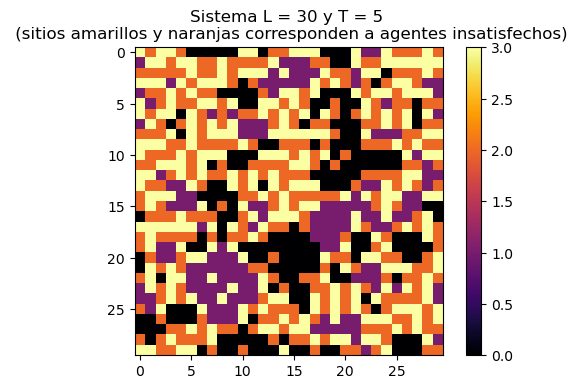

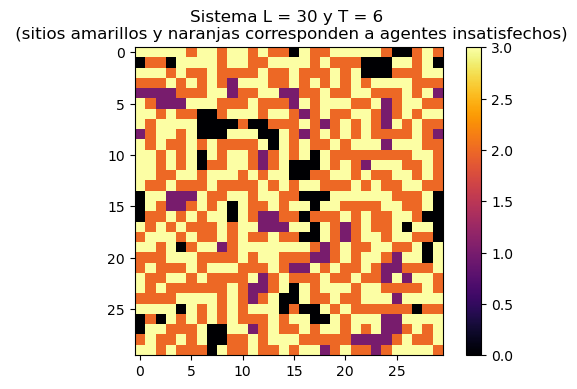

In [11]:
# Configuraciones iniciales

sch_T[3].lattice_plot()
sch_T[4].lattice_plot()
sch_T[5].lattice_plot()
sch_T[6].lattice_plot()

In [12]:
for T in [3, 4, 5, 6]:
    for step in range(max_steps):
        sch_T[T].ronda_intercambio()  # Realiza intercambios
        sat_T[T].append(sch_T[T].satisfaccion_total_avg())
        
        # Cortamos la evolución de la simulación antes de llegar a max_steps
        # si el sistema ya cumple la condición de equilibrio
        
        if criterio_equilibrio(sat_T[T], 20, 0.001):
            break  

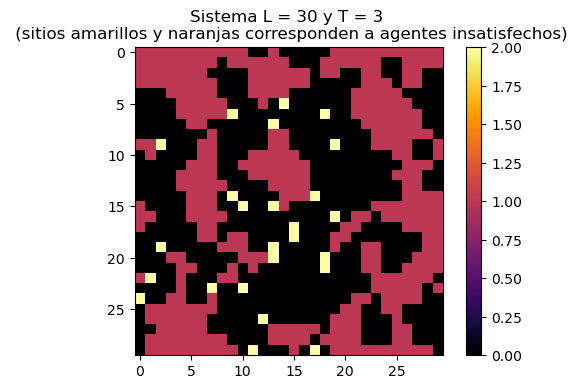

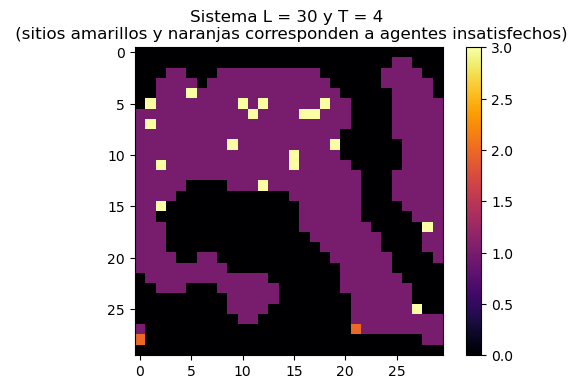

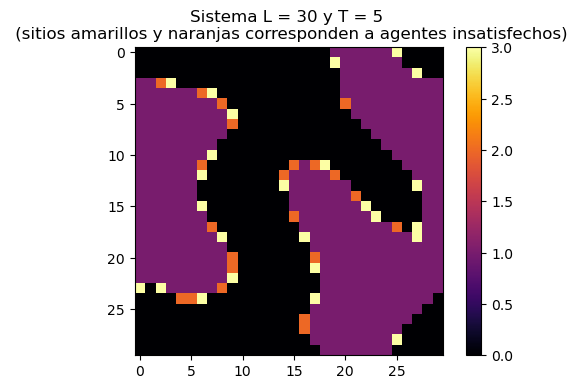

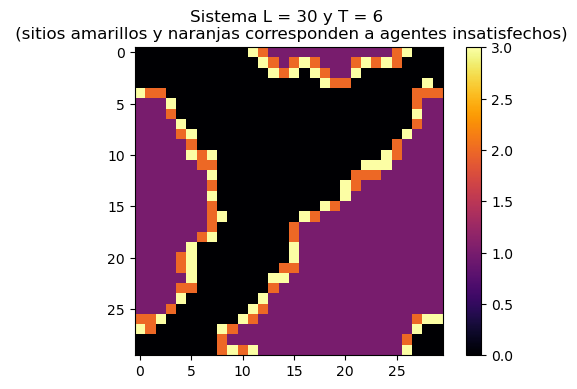

In [13]:
# Configuraciones finales

sch_T[3].lattice_plot()
sch_T[4].lattice_plot()
sch_T[5].lattice_plot()
sch_T[6].lattice_plot()

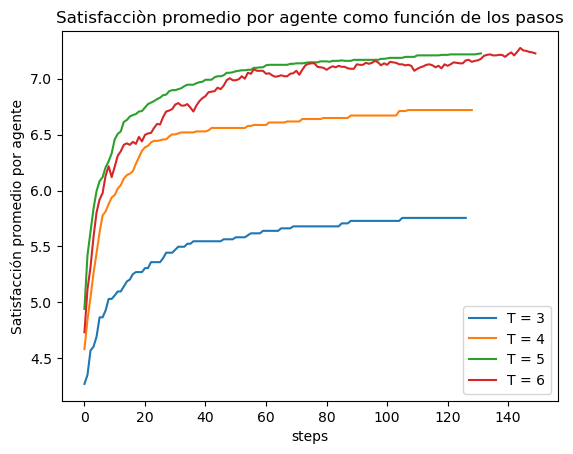

In [14]:
plt.plot(sat_T[3], label = "T = 3")
plt.plot(sat_T[4], label = "T = 4")
plt.plot(sat_T[5], label = "T = 5")
plt.plot(sat_T[6], label = "T = 6")

plt.xlabel("steps")
plt.ylabel("Satisfacción promedio por agente")
plt.title("Satisfacciòn promedio por agente como función de los pasos")
plt.legend()
plt.show()